# E-COMMERCE ANALYSIS PROJECT

### Harshit Agarwal

<img src='Ecommerce_pic.jpg' height="70%"/>

<p text-style="cursive">
I will be using <b>Linear Regression</b> to advise a (fake) <strong>Ecommerce</strong> company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
<br><br>
The company is trying to decide whether to focus their efforts on their mobile app experience or their website.
<br><br>
We'll first explore this data, before using Linear Regression to study the correlations between the different factors and how they affect the how much the customer spends.
</p>

## IMPORTING USEFUL LIBRARIES

In [1]:
###For Computation
import numpy as np
import pandas as pd

###For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Let's get the data and Explore it

In [2]:
dframe=pd.read_csv('Ecommerce Customers')

In [3]:
dframe.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
dframe.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Let's Visualize the data

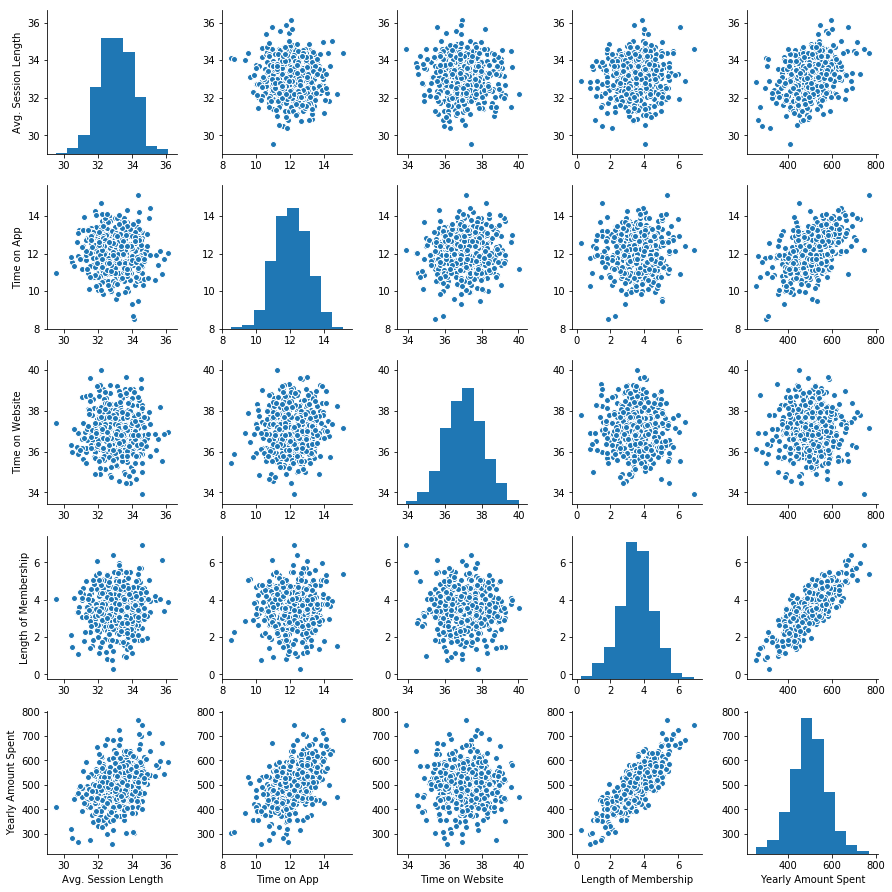

In [5]:
sns.pairplot(dframe)

# Visualizing correlation among data

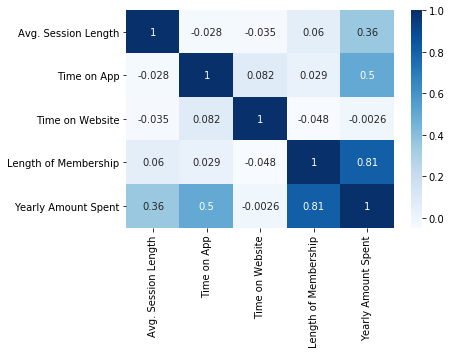

In [6]:
sns.heatmap(dframe.corr(),cmap='Blues',annot=True)

<p>From Above Visualization we can say that there is a strong relation between <strong>Length of Membership</strong> and <strong>Yearly Amount Spent</strong><br>
But this is quit obvious therefore we will not take care of this</p>

# Regression Plots

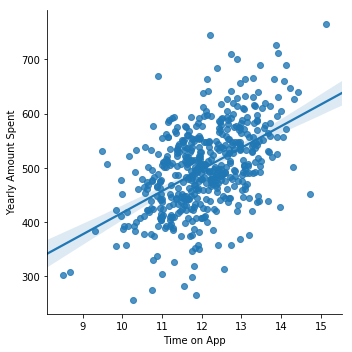

In [7]:
sns.lmplot('Time on App','Yearly Amount Spent',dframe)

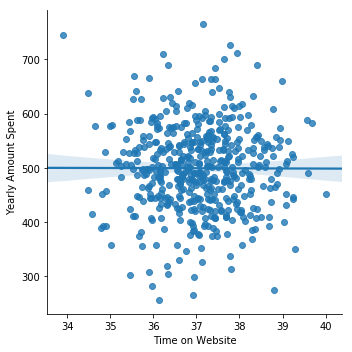

In [8]:
sns.lmplot('Time on Website','Yearly Amount Spent',dframe)

From Above regression plots we can say that <strong>Time on App</strong>  much better describes the pattern

# Preparing Data

In [9]:
### Our target label is Yearly Amount Spent
X=dframe[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
Y=dframe['Yearly Amount Spent']

# Splitting data

In [10]:
### To split the data into training and testing data
from sklearn.cross_validation import train_test_split

E:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
### Training size=80% and remaining 20% will be used for testing
features_train,features_test,labels_train,labels_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [12]:
### Importing LinearRegression
from sklearn.linear_model import LinearRegression

# Making regressor

In [13]:
reg=LinearRegression()

In [14]:
### Fitting the data on training data
reg.fit(features_train,labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
### Making predictions 
pred=reg.predict(features_test)

# Let's visualize the predictions

Text(0,0.5,'Predicted Y')

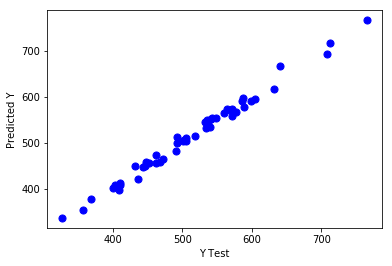

In [16]:
plt.scatter(labels_test,pred,c='blue',s=1*len(labels_test),norm=True,marker="o")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Let's get the coefficients

In [17]:
for feature,coef_ in zip(X,reg.coef_):
    print(feature,":",coef_)
    

Avg. Session Length : 25.9597992852
Time on App : 38.803433857
Time on Website : 0.556323150406
Length of Membership : 61.4419480633


# We can see coefficient of 'Time on App' is much higher than other three

It means  company should focus their efforts on their <strong>mobile app</strong>  more than their website. 


## Checking r-square score

In [18]:
### To evaluate the model
from sklearn.metrics import r2_score

In [19]:
r2_score(pred,labels_test)

0.98834277115820435

### R2 Square score is pretty good . It means model is doing good 

# Thank You